### 18 Augmentation
In this notebook we augment the Salicon images using 18 techniques and predict their maps using a teacher network.


In [1]:
print("test")

test


In [10]:
cd saliency

[Errno 2] No such file or directory: 'saliency'
/data/dhahri/saliency


In [4]:
#!pip install wandb

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.9 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 182 kB 53.7 MB/s eta 0:00:01
     |████████████████████████████████| 174 kB 85.1 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 5.7 MB/s  eta 0:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21494 sha256=55ea166b10b674de9c14e41fbe24c3e4c5a1226ee23f0197f8ddf7a109a78299
  Stored in directory: /home/dhahri/.cache/pip/wheels/54/aa/01/724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8785 sha256=fe5587e0b107b8164f0cd698c3c62ee9977cc20c4e8d8964324722ec8a4e7d57
  Stored in directory: /home/dhahri/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built promise pathtools
  Consider adding this directory to PATH or, if you prefer to suppress this wa

In [3]:
print("done")

done


In [5]:
#!python aug_dir.py

methods imported
augmenting: Rotate-45
augmenting: Rotate135
augmenting: boundaries
augmenting: Cropping1
augmenting: Cropping2
augmenting: JpegCompression1
augmenting: JpegCompression2


In [4]:
methods = ["MotionBlur1", "MotionBlur2", "Noise1", "Noise2", "Contrast1", "Contrast2", "Mirroring", "Inversion", "Shearing1", "Shearing2", "Shearing3", "Rotate-45", "Rotate135", "boundaries", "Cropping1", "Cropping2", "JpegCompression1", "JpegCompression2"]

In [5]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import matplotlib.pyplot as plt
import random
import os
import cv2

COCO_train2014_000000012698.jpg


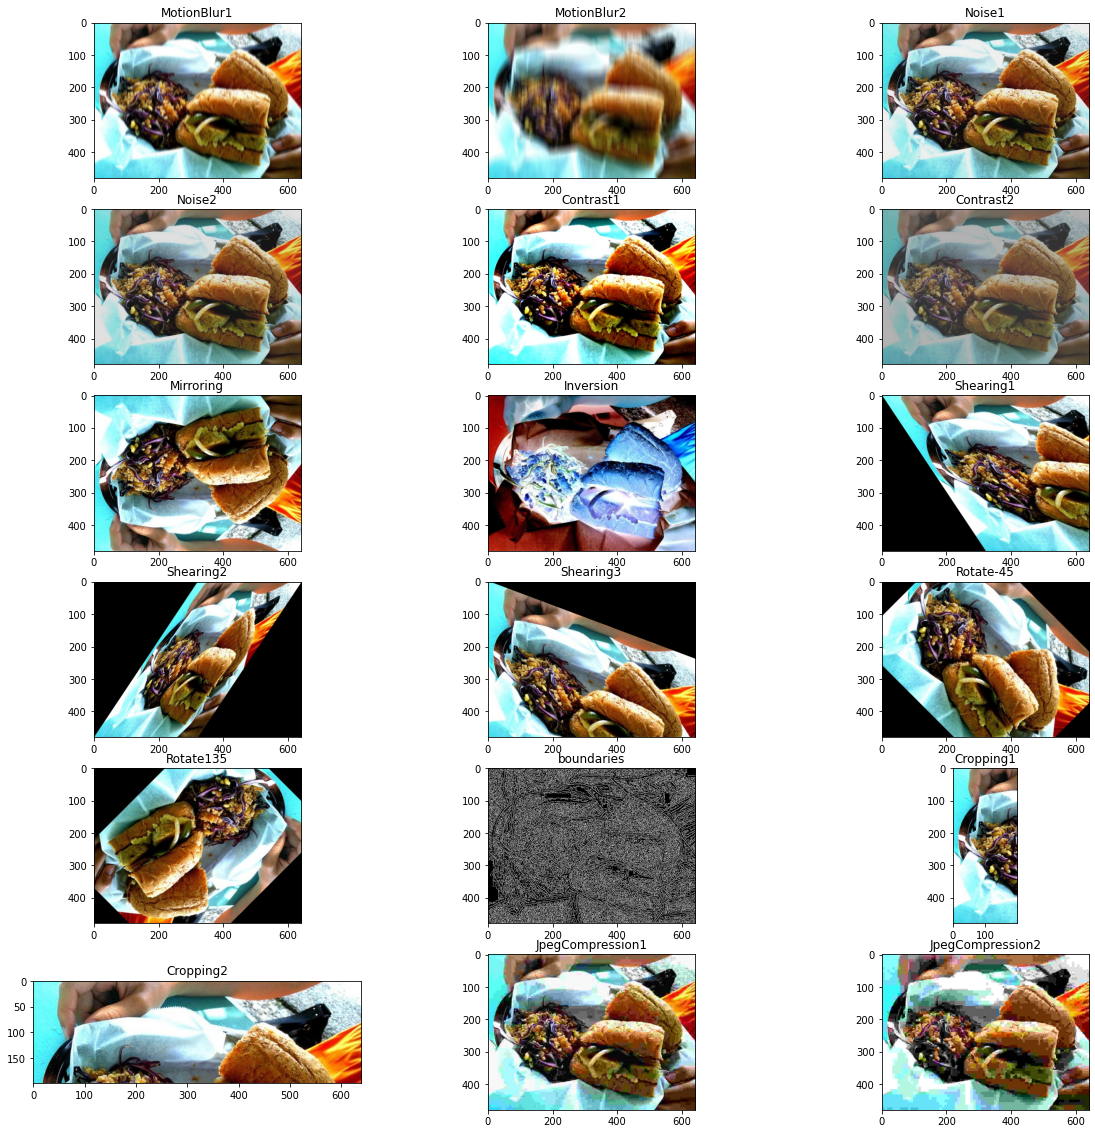

In [11]:
fig = plt.figure(figsize=(20, 20))
# sample same image from each method and show it in a 6x3 grid
#img_name = random.choice(os.listdir("augmented/images/"+methods[0]))
#img_name_only = img_name.split("/")[-1]
img_name_only = "COCO_train2014_000000012698.jpg"
print(img_name_only)
for i in range(1, 19):
    img = random.choice(os.listdir("augmented/images/"+methods[i-1]))
    img = cv2.imread(os.path.join("augmented/images/"+methods[i-1], img_name_only))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(6, 3, i)
    plt.imshow(img)
    plt.title(methods[i-1])

Text(0.5, 1.0, 'Original Map')

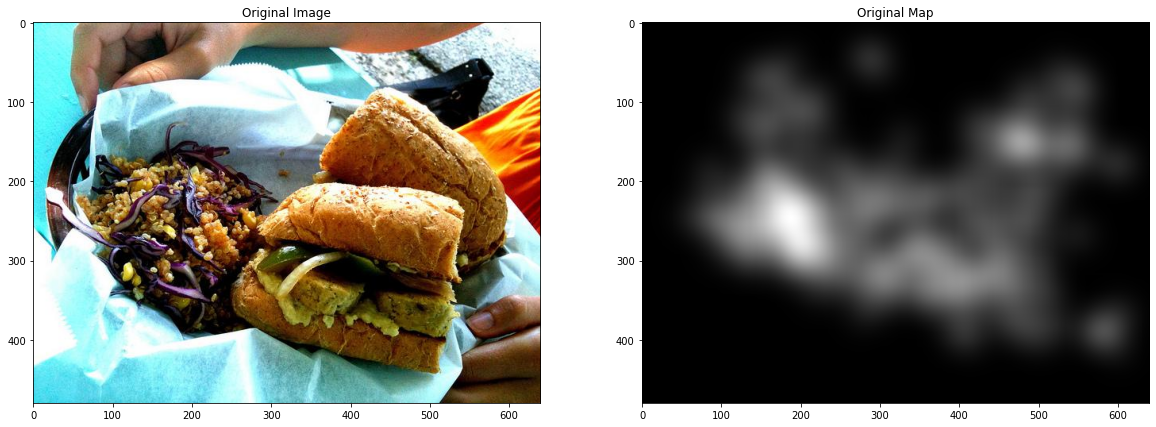

In [20]:
fig = plt.figure(figsize=(20, 20))
img = cv2.imread(os.path.join("dataset/images/train/", img_name_only))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig.add_subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
img_png_ext = img_name_only.split(".")[0]+".png"
img_png_ext = cv2.imread(os.path.join("dataset/maps/train/", img_png_ext))
img_png_ext = cv2.cvtColor(img_png_ext, cv2.COLOR_BGR2RGB)
fig.add_subplot(1, 2, 2)
plt.imshow(img_png_ext)
plt.title("Original Map")


### Creating maps
Please note that wrapping everything in functions has for a goal to avoid comments and each cell to be exectued once. Here we aim to used our pretrained network to predict the 

In [22]:
# create maps dir
def creat_maps(methods)
    for method in methods:  
            if not os.path.exists("augmented/maps/"+method):
                os.makedirs("augmented/maps/"+method)

In [27]:
def predict_maps(methods):
    """ It will be called in a different cell just to be able to see the progress as a cell output """
    for method in methods:
        print(method)
        os.system("python SimpleNet/test.py --val_img_dir saliency/augmented/images/"+method+" --results_dir saliency/augmented/maps/"+method) 
    

In [28]:
#predict_maps(methods)

MotionBlur1
MotionBlur2
Noise1
Noise2
Contrast1
Contrast2
Mirroring
Inversion
Shearing1
Shearing2
Shearing3
Rotate-45
Rotate135
boundaries
Cropping1
Cropping2
JpegCompression1
JpegCompression2


In [8]:
!pip install torchsummary

Defaulting to user installation because normal site-packages is not writeable


In [29]:
methods = ["MotionBlur1", "MotionBlur2", "Noise1", "Noise2", "Contrast1", "Contrast2", "Mirroring", "Inversion", "Shearing1", "Shearing2", "Shearing3", "Rotate-45", "Rotate135", "boundaries", "Cropping1", "Cropping2", "JpegCompression1", "JpegCompression2"]

In [37]:
# remove ipynb checkpoints that appear out of no where
for method in methods:
    if os.path.exists("saliency/augmented/images/"+method+"/.ipynb_checkpoints"):
        shutil.rmtree("saliency/augmented/images/"+method+"/.ipynb_checkpoints")
    else:
        print(f"Directory does not exist in {method}")

Directory does not exist in MotionBlur1
Directory does not exist in MotionBlur2
Directory does not exist in Noise1
Directory does not exist in Noise2
Directory does not exist in Contrast1
Directory does not exist in Contrast2
Directory does not exist in Mirroring
Directory does not exist in Inversion
Directory does not exist in Shearing1
Directory does not exist in Shearing2
Directory does not exist in Shearing3
Directory does not exist in Rotate-45
Directory does not exist in Rotate135
Directory does not exist in boundaries
Directory does not exist in Cropping1
Directory does not exist in Cropping2
Directory does not exist in JpegCompression1
Directory does not exist in JpegCompression2


In [9]:
!python SimpleNet/test.py --val_img_dir "augmented/images/MotionBlur1" --results_dir "augmented/maps/MotionBlur1"

PNAS Model
96 96 54
96 270 108
270 540 216
540 1080 216
1080 1080 216
1080 1080 216
1080 1080 432
1080 2160 432
2160 2160 432
2160 2160 432
2160 2160 864
2160 4320 864
4320 4320 864
4320 4320 864
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/home/dhahri/.local/lib/python3.8/site-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)
100%|█████████████████████████████████████| 10000/10000 [10:02<00:00, 16.60it/s]


In [10]:
!python SimpleNet/test.py --val_img_dir "augmented/images/MotionBlur2" --results_dir "augmented/maps/MotionBlur2"

PNAS Model
96 96 54
96 270 108
270 540 216
540 1080 216
1080 1080 216
1080 1080 216
1080 1080 432
1080 2160 432
2160 2160 432
2160 2160 432
2160 2160 864
2160 4320 864
4320 4320 864
4320 4320 864
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/home/dhahri/.local/lib/python3.8/site-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)
100%|█████████████████████████████████████| 10000/10000 [10:21<00:00, 16.10it/s]


In [11]:
!python SimpleNet/test.py --val_img_dir "augmented/images/Noise1" --results_dir "augmented/maps/Noise1"

PNAS Model
96 96 54
96 270 108
270 540 216
540 1080 216
1080 1080 216
1080 1080 216
1080 1080 432
1080 2160 432
2160 2160 432
2160 2160 432
2160 2160 864
2160 4320 864
4320 4320 864
4320 4320 864
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/home/dhahri/.local/lib/python3.8/site-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)
100%|█████████████████████████████████████| 10000/10000 [10:17<00:00, 16.20it/s]


In [12]:
!python SimpleNet/test.py --val_img_dir "augmented/images/Noise2" --results_dir "augmented/maps/Noise2"

PNAS Model
96 96 54
96 270 108
270 540 216
540 1080 216
1080 1080 216
1080 1080 216
1080 1080 432
1080 2160 432
2160 2160 432
2160 2160 432
2160 2160 864
2160 4320 864
4320 4320 864
4320 4320 864
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/home/dhahri/.local/lib/python3.8/site-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)
100%|█████████████████████████████████████| 10000/10000 [09:56<00:00, 16.77it/s]


In [13]:
!python SimpleNet/test.py --val_img_dir "augmented/images/Contrast1" --results_dir "augmented/maps/Contrast1"

PNAS Model
96 96 54
96 270 108
270 540 216
540 1080 216
1080 1080 216
1080 1080 216
1080 1080 432
1080 2160 432
2160 2160 432
2160 2160 432
2160 2160 864
2160 4320 864
4320 4320 864
4320 4320 864
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/home/dhahri/.local/lib/python3.8/site-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)
100%|█████████████████████████████████████| 10000/10000 [09:58<00:00, 16.71it/s]


In [14]:
!python SimpleNet/test.py --val_img_dir "augmented/images/Contrast2" --results_dir "augmented/maps/Contrast2"

PNAS Model
96 96 54
96 270 108
270 540 216
540 1080 216
1080 1080 216
1080 1080 216
1080 1080 432
1080 2160 432
2160 2160 432
2160 2160 432
2160 2160 864
2160 4320 864
4320 4320 864
4320 4320 864
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/home/dhahri/.local/lib/python3.8/site-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)
100%|█████████████████████████████████████| 10000/10000 [10:02<00:00, 16.60it/s]


In [15]:
!python SimpleNet/test.py --val_img_dir "augmented/images/Mirroring" --results_dir "augmented/maps/Mirroring"

PNAS Model
96 96 54
96 270 108
270 540 216
540 1080 216
1080 1080 216
1080 1080 216
1080 1080 432
1080 2160 432
2160 2160 432
2160 2160 432
2160 2160 864
2160 4320 864
4320 4320 864
4320 4320 864
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/home/dhahri/.local/lib/python3.8/site-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)
100%|█████████████████████████████████████| 10000/10000 [09:56<00:00, 16.76it/s]


In [16]:
!python SimpleNet/test.py --val_img_dir "augmented/images/Inversion" --results_dir "augmented/maps/Inversion"

PNAS Model
96 96 54
96 270 108
270 540 216
540 1080 216
1080 1080 216
1080 1080 216
1080 1080 432
1080 2160 432
2160 2160 432
2160 2160 432
2160 2160 864
2160 4320 864
4320 4320 864
4320 4320 864
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/home/dhahri/.local/lib/python3.8/site-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)
100%|█████████████████████████████████████| 10000/10000 [10:05<00:00, 16.50it/s]


In [17]:
!python SimpleNet/test.py --val_img_dir "augmented/images/Shearing1" --results_dir "augmented/maps/Shearing1"

PNAS Model
96 96 54
96 270 108
270 540 216
540 1080 216
1080 1080 216
1080 1080 216
1080 1080 432
1080 2160 432
2160 2160 432
2160 2160 432
2160 2160 864
2160 4320 864
4320 4320 864
4320 4320 864
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/home/dhahri/.local/lib/python3.8/site-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)
100%|█████████████████████████████████████| 10000/10000 [09:54<00:00, 16.83it/s]


In [18]:
!python SimpleNet/test.py --val_img_dir "augmented/images/Shearing2" --results_dir "augmented/maps/Shearing2"

PNAS Model
96 96 54
96 270 108
270 540 216
540 1080 216
1080 1080 216
1080 1080 216
1080 1080 432
1080 2160 432
2160 2160 432
2160 2160 432
2160 2160 864
2160 4320 864
4320 4320 864
4320 4320 864
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/home/dhahri/.local/lib/python3.8/site-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)
100%|█████████████████████████████████████| 10000/10000 [09:54<00:00, 16.82it/s]


!python SimpleNet/test.py --val_img_dir "augmented/images/Shearing3" --results_dir "augmented/maps/Shearing3"

In [39]:
!python SimpleNet/test.py --val_img_dir "augmented/images/Rotate-45" --results_dir "augmented/maps/Rotate-45"

PNAS Model
96 96 54
96 270 108
270 540 216
540 1080 216
1080 1080 216
1080 1080 216
1080 1080 432
1080 2160 432
2160 2160 432
2160 2160 432
2160 2160 864
2160 4320 864
4320 4320 864
4320 4320 864
  0%|                                                 | 0/10000 [00:00<?, ?it/s]/home/dhahri/.local/lib/python3.8/site-packages/torchvision/utils.py:50: UserWarning: range will be deprecated, please use value_range instead.
  warnings.warn(warning)
100%|█████████████████████████████████████| 10000/10000 [09:59<00:00, 16.69it/s]


In [ ]:
!python SimpleNet/test.py --val_img_dir "augmented/images/Rotate135" --results_dir "augmented/maps/Rotate135"

In [ ]:
!python SimpleNet/test.py --val_img_dir "augmented/images/boundaries" --results_dir "augmented/maps/boundaries"

In [ ]:
!python SimpleNet/test.py --val_img_dir "augmented/images/Cropping1" --results_dir "augmented/maps/Cropping1"

In [ ]:
!python SimpleNet/test.py --val_img_dir "augmented/images/Cropping2" --results_dir "augmented/maps/Cropping2"

In [ ]:
!python SimpleNet/test.py --val_img_dir "augmented/images/JpegCompression1" --results_dir "augmented/maps/JpegCompression1"

In [ ]:
!python SimpleNet/test.py --val_img_dir "augmented/images/JpegCompression2" --results_dir "augmented/maps/JpegCompression2"

All the augmentations and their mapping predictions are done. Now we train for each specific augmentation.

In [41]:
 # check the number of images in each method directory
for method in methods:
    print(method, len(os.listdir("augmented/maps/"+method)))

MotionBlur1 10000
MotionBlur2 10001
Noise1 10000
Noise2 10000
Contrast1 10000
Contrast2 10000
Mirroring 10000
Inversion 10000
Shearing1 10000
Shearing2 10000
Shearing3 10000
Rotate-45 10000
Rotate135 10000
boundaries 10000
Cropping1 10000
Cropping2 10000
JpegCompression1 10000
JpegCompression2 10000


In [ ]:
fig = plt.figure(figsize=(20, 20))
for i in range(1, 19):
    img = random.choice(os.listdir("augmented/maps/"+methods[i-1]))
    img = cv2.imread(os.path.join("augmented/maps/"+methods[i-1], img_name_only))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(6, 3, i)
    plt.imshow(img)
    plt.title(methods[i-1])

In [23]:
img_gt = cv2.imread(os.path.join("dataset/maps/train/", img_name_only.split(".")[0]+".png"))

In [35]:
methods_excrop = ["MotionBlur1", "MotionBlur2", "Noise1", "Noise2", "Contrast1", "Contrast2", "Mirroring", "Inversion", "Shearing1", "Shearing2", "Shearing3", "Rotate-45", "Rotate135", "boundaries", "JpegCompression1", "JpegCompression2"]

In [38]:
import pandas as pd

MotionBlur1


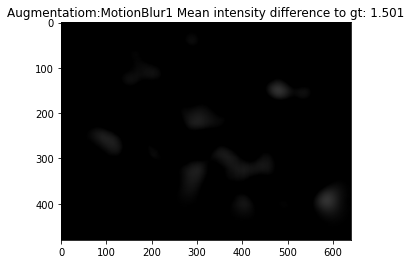

MotionBlur2


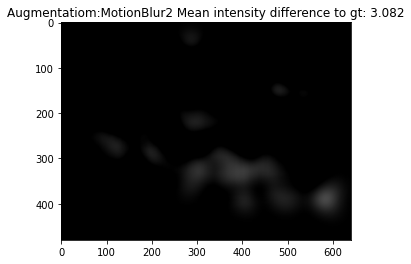

Noise1


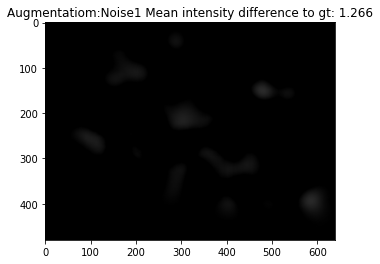

Noise2


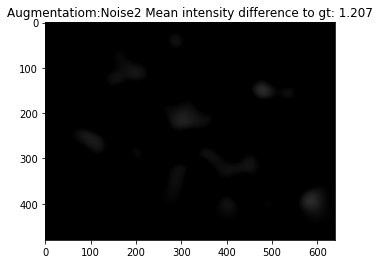

Contrast1


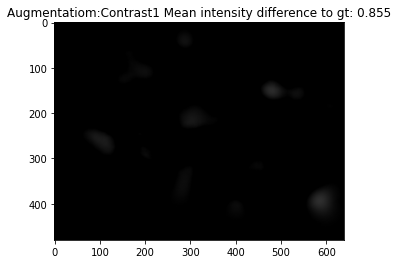

Contrast2


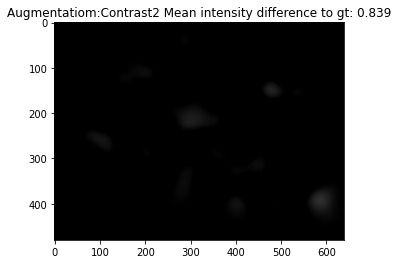

Mirroring


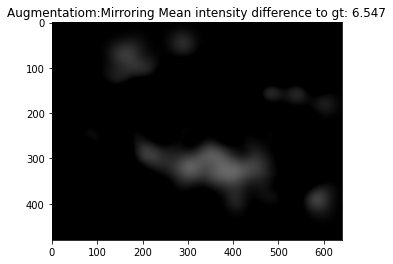

Inversion


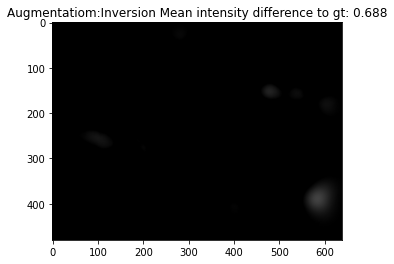

Shearing1


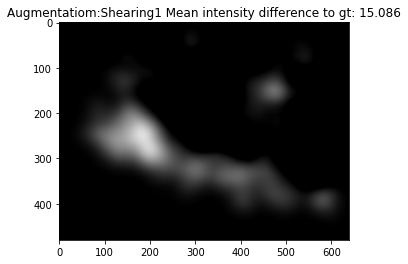

Shearing2


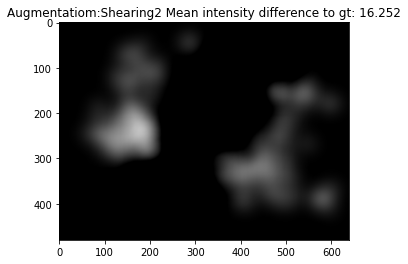

Shearing3


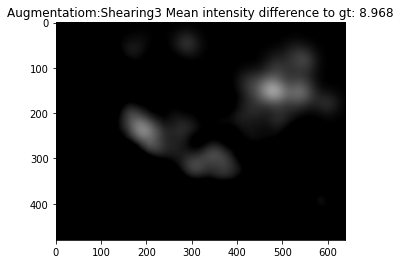

Rotate-45


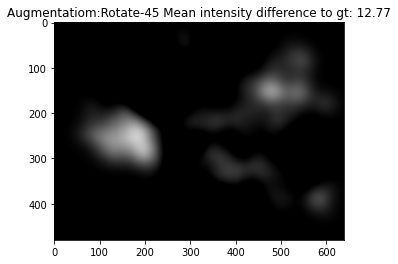

Rotate135


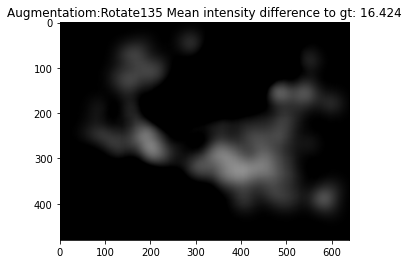

boundaries


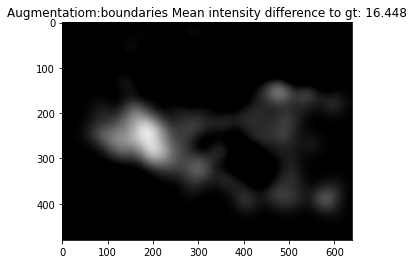

JpegCompression1


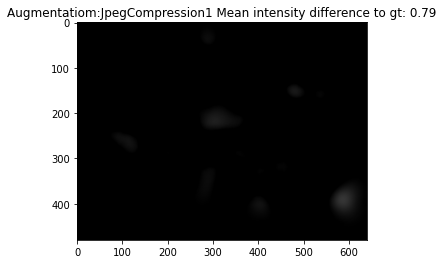

JpegCompression2


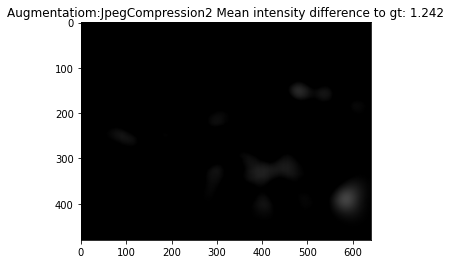

In [46]:
df_new = pd.DataFrame(columns=["method", "mean_intensity_difference"])
for i in methods_excrop:
    img2 = cv2.imread(os.path.join("augmented/maps/"+i, img_name))
    if len(img_gt)== len(img2):
        print(i)
        diff = cv2.subtract(img_gt, img2)
        mean_intensity = cv2.mean(diff)[0]
        df_new = df_new.append({"method": i, "mean_intensity_difference": round(mean_intensity,3)}, ignore_index=True)
        plt.imshow(diff)
        plt.title("Augmentatiom:{} Mean intensity difference to gt: {}".format(i,round(mean_intensity,3)))
        plt.savefig(f"figures_report/differencegt_{i}.png")
        plt.show()
        

In [42]:
df_new.head()
df_new.to_csv("csvs/retargeting.csv")

In [47]:
samp=os.listdir("augmented/images/"+methods[0])[:100]

In [50]:
import numpy as np

In [52]:
df_new = pd.DataFrame(columns=["method", "mean_intensity_difference"])
for i in methods_excrop:
    mean_intensity_list = []
    for img_name in samp:
        img2 = cv2.imread(os.path.join("augmented/maps/"+i, img_name))
        img_gt = cv2.imread(os.path.join("dataset/maps/train/", img_name.split(".")[0]+".png"))
        diff = cv2.subtract(img_gt, img2)
        mean_intensity = cv2.mean(diff)[0]
        mean_intensity_list.append(mean_intensity)
    df_new = df_new.append({"method": i, "mean_intensity_difference": np.mean(mean_intensity_list)}, ignore_index=True)
    

In [53]:
df_new.to_csv("csvs/retargeting_100.csv")

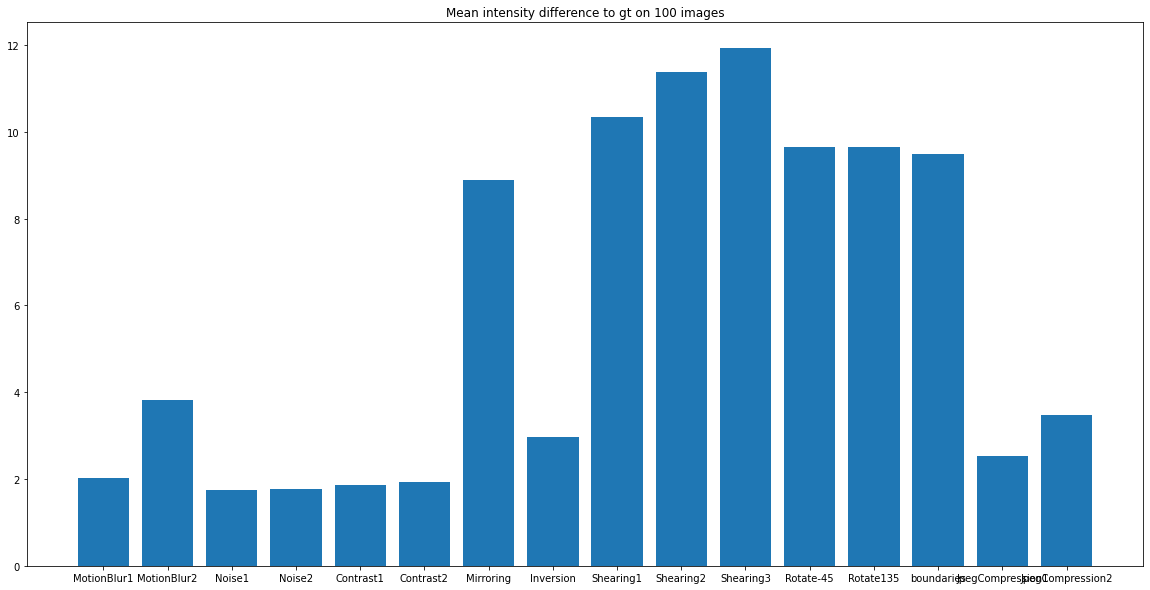

In [54]:
# plot the mean intensity difference data frame
plt.figure(figsize=(20, 10))
plt.bar(df_new["method"], df_new["mean_intensity_difference"])
plt.title("Mean intensity difference to gt on 100 images")
plt.show()